In [ ]:
# !pip install Pillow
# !pip install scikit-image
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install torch
# !pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.3 MB/s eta 0:00:00 0:00:01


In [90]:
import os
from PIL import Image,ImageDraw,ImageCms
import skimage.io as io
import skimage.color as convertor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

from time import time

In [91]:
root = "../../datasets/design_seed_by_labels/"
files = os.listdir(root)
print("Size of Raw Dataset",len(files))

Size of Raw Dataset 202


Raw image size (639, 584)
Ideal image size we are aiming for (303, 277)


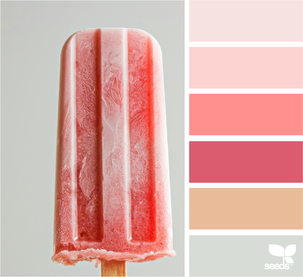

In [92]:
# This cell allows viewing of dataset images by selecting an index.

#@title Dataset Viewer { run: "auto", vertical-output: true }

image_idx = 48 #@param {type:"slider", min:0, max:1043, step:1}  # Select image index using a slider
im_temp = Image.open(root + files[image_idx])  # Load the selected image from the dataset

print(f"Raw image size", im_temp.size)  # Print the original size of the image

SCALE_FACTOR = 1 / 0.95  # Define scaling factor for resizing
im_temp.thumbnail((288 * SCALE_FACTOR, 432 * SCALE_FACTOR), Image.LANCZOS)  # Resize image while maintaining aspect ratio

print("Ideal image size we are aiming for", im_temp.size)  # Print the new size after resizing
im_temp  # Display the resized image

In [93]:
# Initialize empty lists to store widths and heights of images
w = []
h = []

# Start timing the image loading process
st = time()

# Loop through each image name in the list of files
for image_names in files:
    im = Image.open(root + image_names)  # Open the image using its file path
    a = im.size  # Get the size of the image (width, height)
    w.append(a[0])  # Append width to the width list
    h.append(a[1])  # Append height to the height list

# Print the time taken to load all images
print(f"Loading each image took {time() - st}s")

# Create a DataFrame to hold image names and their corresponding dimensions
dat = pd.DataFrame({"names": files, "width": w, "height": h})

Loading each image took 0.040918827056884766s


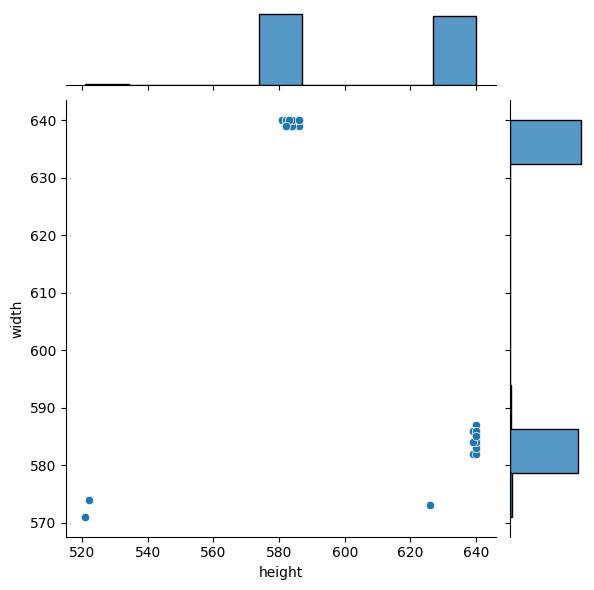

In [94]:
sns.jointplot(y = dat["width"],x=dat["height"])

In [95]:
dat[dat["height"] < 580 ]

,names,width,height
9,ColorWander_8_1_24_.jpg,571,521
139,ColorWander_5_22_24.png,574,522


In [ ]:
# dat_clean = dat[dat["height"] > 800 ].copy()
# print(f"clean dataset size {len(dat_clean)}")
# dat_clean.reset_index()

dat_clean = dat.copy()

# h = horizontal
# v = vertical
# not sure what the use of "split" is yet (small or big)
dat_clean.loc[:,"or"] = dat_clean["height"].apply(lambda x: "h" if x > 620 else "v")
dat_clean.loc[:,"split"] = dat_clean["width"].apply(lambda x: "small" if x < 620 else "big")

dat_clean = dat_clean.reset_index()
len(dat_clean)


202

In [97]:
dat_clean

,index,names,width,height,or,split
0,0,PigmentedPaletted_6_3_24_.png,640,584,v,big
1,1,FloraTones_7_25_24_.png,586,640,h,small
2,2,AutumnNature_7_23_24.png,585,640,h,small
3,3,ColorChirp_5_21_24_.png,640,584,v,big
4,4,ChilledTones_6_4_24_.png,585,640,h,small
...,...,...,...,...,...,...
197,197,CrystalColors_.4_4_24png.png,586,640,h,small
198,198,FreshHues_6_3_24_.png,585,640,h,small
199,199,ColorView_7_25_24_.png,640,586,v,big
200,200,FloraTones_7_30_24_.png,640,583,v,big


In [98]:
dat_clean[dat_clean["or"] == "v"]

,index,names,width,height,or,split
0,0,PigmentedPaletted_6_3_24_.png,640,584,v,big
3,3,ColorChirp_5_21_24_.png,640,584,v,big
8,8,ColorServe_7_29_24_.png,640,585,v,big
9,9,ColorWander_8_1_24_.jpg,571,521,v,small
15,15,IcecreamPalette_6_2_24_.png,640,584,v,big
...,...,...,...,...,...,...
195,195,ColorLily_5_23_24_.png,640,584,v,big
196,196,ColorPerched_5_8_24_.png,640,584,v,big
199,199,ColorView_7_25_24_.png,640,586,v,big
200,200,FloraTones_7_30_24_.png,640,583,v,big


In [99]:
dat_clean[dat_clean["or"] == "h"]

,index,names,width,height,or,split
1,1,FloraTones_7_25_24_.png,586,640,h,small
2,2,AutumnNature_7_23_24.png,585,640,h,small
4,4,ChilledTones_6_4_24_.png,585,640,h,small
5,5,NaturePalette_5_21_24_.png,584,640,h,small
6,6,SpringTones_4_24_24_.png,586,640,h,small
...,...,...,...,...,...,...
191,191,FloraAndFauna_5_1_24_.png,584,640,h,small
193,193,MineralTones_7_23_24_.png,586,640,h,small
194,194,ColorWander_7_3_24_.png,584,639,h,small
197,197,CrystalColors_.4_4_24png.png,586,640,h,small


In [100]:
dat_clean[dat_clean["split"] == "small"]

,index,names,width,height,or,split
1,1,FloraTones_7_25_24_.png,586,640,h,small
2,2,AutumnNature_7_23_24.png,585,640,h,small
4,4,ChilledTones_6_4_24_.png,585,640,h,small
5,5,NaturePalette_5_21_24_.png,584,640,h,small
6,6,SpringTones_4_24_24_.png,586,640,h,small
...,...,...,...,...,...,...
191,191,FloraAndFauna_5_1_24_.png,584,640,h,small
193,193,MineralTones_7_23_24_.png,586,640,h,small
194,194,ColorWander_7_3_24_.png,584,639,h,small
197,197,CrystalColors_.4_4_24png.png,586,640,h,small


In [101]:
dat_clean[dat_clean["split"] == "big"]

,index,names,width,height,or,split
0,0,PigmentedPaletted_6_3_24_.png,640,584,v,big
3,3,ColorChirp_5_21_24_.png,640,584,v,big
8,8,ColorServe_7_29_24_.png,640,585,v,big
15,15,IcecreamPalette_6_2_24_.png,640,584,v,big
17,17,ColorHeaven_5_17_24_.png,639,582,v,big
...,...,...,...,...,...,...
195,195,ColorLily_5_23_24_.png,640,584,v,big
196,196,ColorPerched_5_8_24_.png,640,584,v,big
199,199,ColorView_7_25_24_.png,640,586,v,big
200,200,FloraTones_7_30_24_.png,640,583,v,big


In [103]:
#@title Production or Testing?
PROD = False #@param {type:"boolean"}

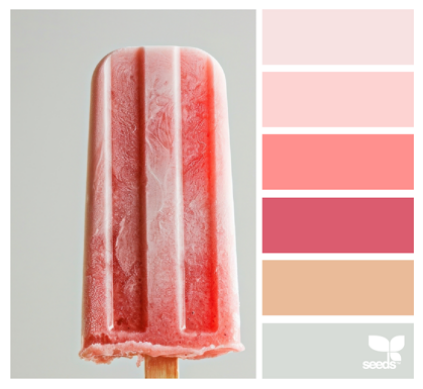

Total Time Taken 0.7827751636505127
Image size (366, 400, 3)


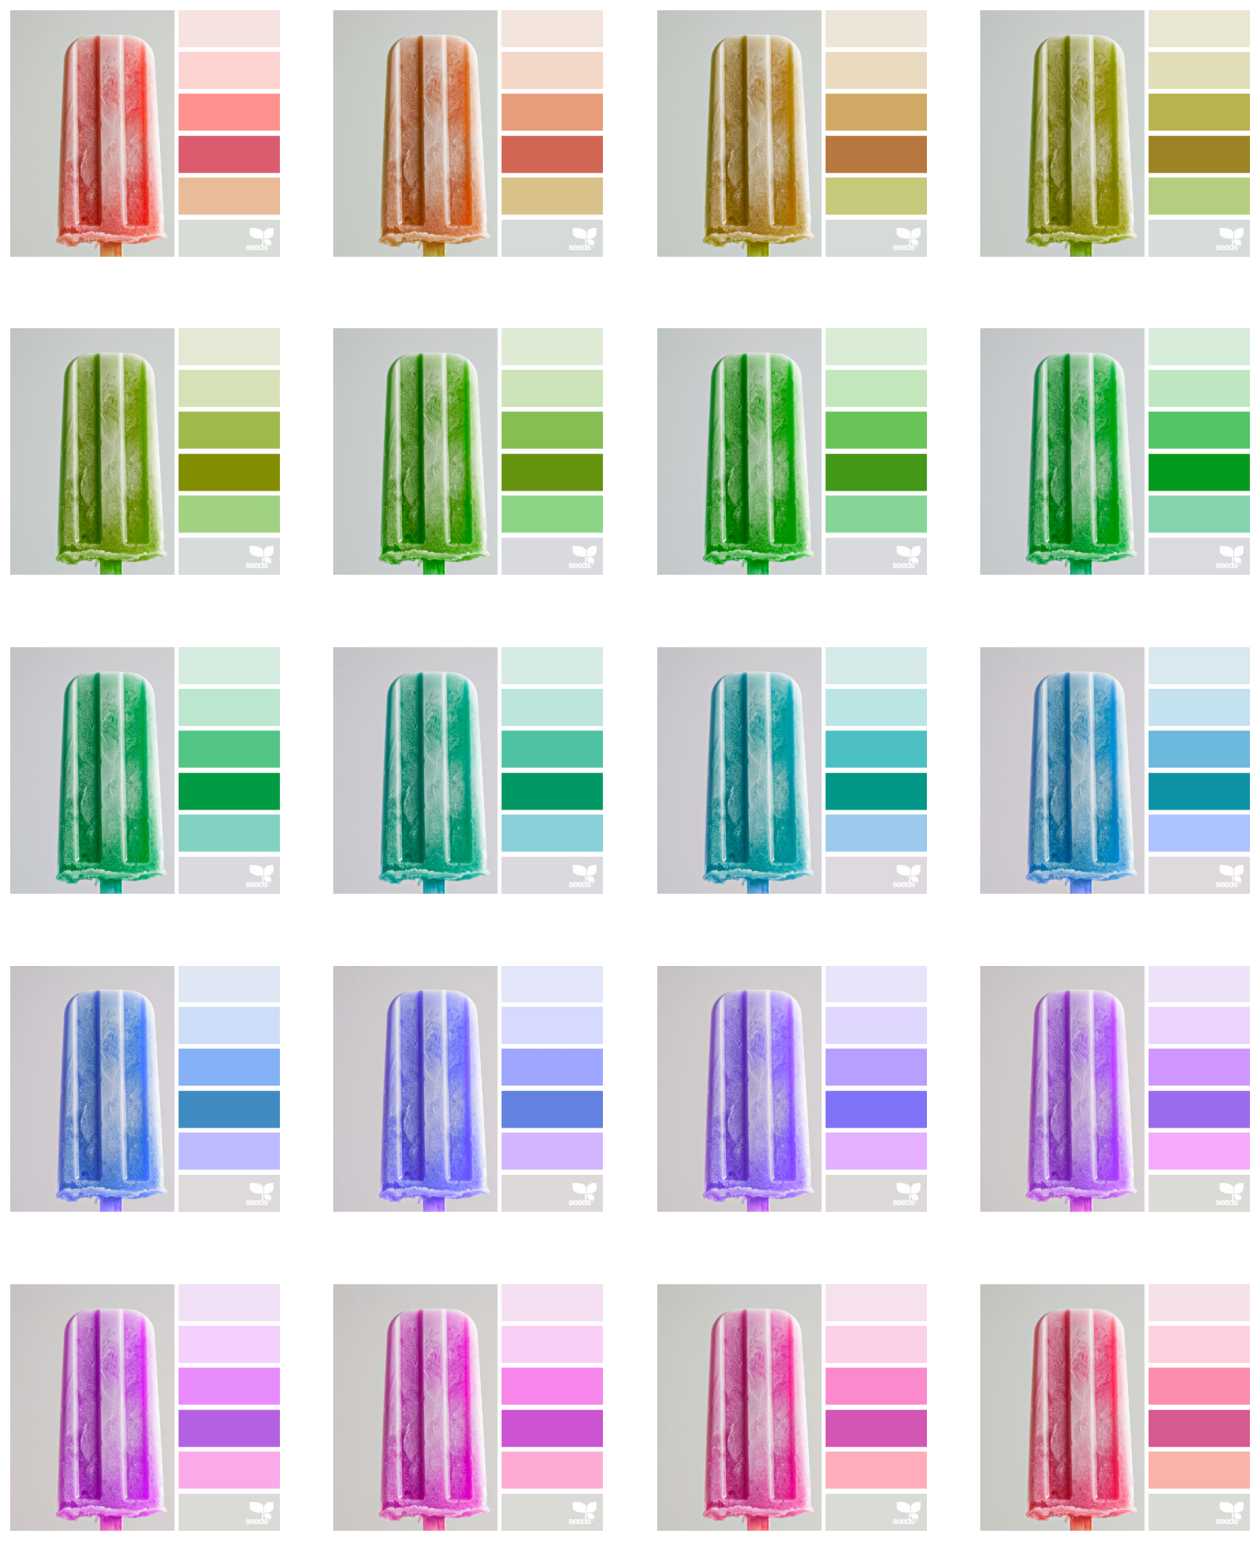

In [107]:
#@title ### Hue Shift Algo { run: "auto", vertical-output: true }

def hueshift(im_array, shifts=20):
    # Convert the input RGB image array to LAB color space
    im_lab = convertor.rgb2lab(im_array)
    
    # Separate out the L (lightness) component of the original image
    im_Lcomp = np.array(im_lab[:, :, 0:1])

    # Convert the input RGB image array to HSV color space
    im_array_hsv = convertor.rgb2hsv(im_array)

    # Initialize a list to store images with shifted hues, starting with the original image
    images = [im_array]

    # Calculate the difference for each hue shift
    shift_diff = 1 / shifts

    # Loop through the number of hue shifts specified (from 1 to shifts-1)
    for ShiftIdx in range(1, shifts):
        # Calculate the new hue by adding the shift to the original hue and wrapping around using modulo 1
        im_hsv_hNEW = (im_array_hsv[:, :, 0:1] + ShiftIdx * shift_diff) % 1
        
        # Create a new HSV image by combining the shifted hue with the original saturation and value channels
        im_hsv_NEW = np.concatenate(
            (im_hsv_hNEW, im_array_hsv[:, :, 1:]),
            axis=2
        ) 

        # Convert the new HSV image back to RGB color space
        im_rgb_NEW = convertor.hsv2rgb(im_hsv_NEW)

        # Convert the new RGB image to LAB color space
        im_LAB_NEW = convertor.rgb2lab(im_rgb_NEW)

        # Combine the original L component with the new A and B components from the LAB image
        im_L_NEW = np.concatenate((
            im_Lcomp, im_LAB_NEW[:, :, 1:]),
            axis=2
        ) 

        # Convert the combined LAB image back to RGB color space
        im_NEW = convertor.lab2rgb(im_L_NEW)

        # Append the newly created RGB image (scaled to 255 and converted to uint8) to the images list
        images.append(np.uint8(im_NEW * 255))

    return images  # Return all images with shifted hues

# Check if we are not in production mode
if PROD == False:
    Sample = 48 #@param {type:"slider", min:0, max:1027, step:1}  # Select an index using a slider for sampling an image

    # Load a sample image from the dataset based on the selected index
    im_temp = Image.open(root + dat_clean.iloc[Sample]["names"])
    
    # Resize the image for display purposes
    im_temp.thumbnail((400, 421))

    plt.imshow(im_temp)  # Display the original sample image
    plt.axis(False)      # Hide axis for better visualization
    plt.show()          # Show the plot

    st = time()         # Start timing for performance measurement
    
    im_temp = np.array(im_temp)  # Convert PIL Image to NumPy array
    im_arr = hueshift(im_temp, 20)  # Apply hue shift algorithm with 20 shifts
    
    print("Total Time Taken", time() - st)  # Print total time taken for processing
    print("Image size", im_arr[0].shape)     # Print size of the first processed image

    # Create a grid of subplots to display shifted images
    fig, ax = plt.subplots(5, 4,
                           squeeze=True,
                           sharex=True,
                           sharey=True,
                           figsize=(16, 20))
    
    for i in range(5):      # Loop through rows of subplots
        for j in range(4):  # Loop through columns of subplots
            ax[i, j].imshow(im_arr[(i * 4) + j])  # Display each shifted image in its subplot
            ax[i, j].axis(False)                    # Hide axis for better visualization

In [ ]:
def vals(im_d0,im_d1):
    return {
        "h":{
            "crop":{
                "img":(0,0,384,256),  #(left, top, right, bottom))
                "palette":(0,256,im_d0,im_d1)
            },
            "palette":[
                (25,85),
                (85,85),
                (155,85),
                (215,85),
                (285,85),
                (345,85),
            ]
        },
        "v":{
            "crop":{
                "img":(0,0,256,384),
                "palette":(256,0,im_d0,im_d1)
            },
            "palette":[
                (75,25),
                (75,95),
                (75,160),
                (75,222),
                (75,285),
                (75,345),
            ]
        }
    }

(421, 385)
Time it took to process:  0.0004038810729980469
[[247, 226, 226], [253, 211, 210], [255, 144, 142], [219, 92, 111], [234, 187, 153], [215, 220, 215]]


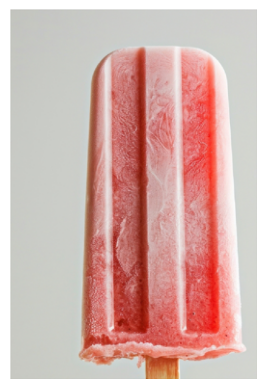

In [ ]:
#@title Crop and extract palette { run: "auto", vertical-output: true }
import json  # Import the JSON library for handling JSON data

def process_image(im, orientation):
    """
    Process the image by cropping it and extracting color palette information based on orientation.

    Parameters:
    - im: The input image (PIL Image object).
    - orientation: The orientation for cropping ('h' for horizontal, 'v' for vertical).

    Returns:
    - im_cropped: The cropped image based on the specified orientation.
    - colors: A list of RGB color values extracted from the palette.
    """
    
    # Get cropping parameters and palette positions based on the image size
    val = vals(*im.size)

    # Crop the image based on the specified orientation
    im_cropped = im.crop(val[orientation]["crop"]["img"])  # Crop the main image
    im_palette = im.crop(val[orientation]["crop"]["palette"])  # Crop the palette area

    # # Extract colors from the palette using the specified coordinates
    # The getpixel(i) method retrieves the color of a pixel at coordinate i. 
    # This color is returned as an RGB tuple, 
    # e.g., (R, G, B), where each component is an integer between 0 and 255.
    colors = [im_palette.getpixel(i) for i in val[orientation]["palette"]]
    
    # Uncomment to debug (this section is commented out)
    # x = 347 #@param {type:"slider", min:0, max:400, step:1}
    # y = 85 #@param {type:"slider", min:0, max:400, step:1}
    
    # Draw lines on the palette for debugging purposes (commented out)
    # draw = ImageDraw.Draw(im_palette)
    # draw.line((0,y) + (im.size[0],y), fill=0)  # Horizontal line at y-coordinate
    # draw.line((x,0) + (x,im.size[1]), fill=0)  # Vertical line at x-coordinate

    return im_cropped, colors  # Return the cropped image and extracted colors

# Check if we are not in production mode
if PROD == False:
    Sample = 48 #@param {type:"slider", min:0, max:1027, step:1}  # Select an index using a slider for sampling an image
    im = Image.open(root + dat_clean.iloc[Sample]["names"])  # Load a sample image from the dataset

    # Resize the image based on its orientation
    if dat_clean.iloc[Sample]["or"] == "v":
        im.thumbnail((421, 400))  # Resize for vertical images
    else:
        im.thumbnail((400, 421))   # Resize for horizontal images
    
    print(im.size)  # Print the size of the resized image

    st = time()  # Start timing for performance measurement
    im, colors = process_image(im, dat_clean.iloc[Sample]["or"])  # Process the image to crop and extract colors
    print("Time it took to process: ", time() - st)  # Print total processing time

    print(json.dumps(colors))  # Print the extracted colors in JSON format
    plt.imshow(im)  # Display the cropped image
    plt.axis(False)  # Hide axis for better visualization

In [117]:
def process(df):
    """
    Process images from a DataFrame by applying hue shifts and saving processed images.

    Parameters:
    - df: A pandas DataFrame containing image names and related metadata.

    Returns:
    - Argumen: A list of dictionaries containing information about processed images.
    - Origin: A list of dictionaries containing information about original images.

    For this make sure to create a folder named "Process" in the current directory with
    2 subfolders named "Original" and "Argu" to store the processed images.
    """
    
    Origin = []  # List to store data about original images
    Argumen = []  # List to store data about processed images

    # Loop through each row in the DataFrame
    for i in range(len(df)): 
        print(i)  # Print the current index for tracking progress
        
        # Extract the name of the image without the file extension
        Name = df.loc[i, "names"].split(".")[0]
        
        # Open the image using its file path
        im = Image.open(root + df.loc[i, "names"])
        
        # Get the orientation of the image (vertical or horizontal)
        Orr = df.loc[i, "or"] 
        
        # Resize the image based on its orientation
        if Orr == "v":
            im.thumbnail((421, 400))  # Resize for vertical images
        else:
            im.thumbnail((400, 421))   # Resize for horizontal images

        im_temp = np.array(im)  # Convert the image to a NumPy array
        shifts = 20  # Define the number of hue shifts to apply
        im_arr = hueshift(im_temp, shifts)  # Apply hue shift algorithm
        
        # Loop through each hue shift
        for ii in range(shifts):
            img = Image.fromarray(im_arr[ii])  # Convert the shifted image back to a PIL Image
            
            # Process the shifted image to crop and extract colors
            im, colors = process_image(img, Orr)
            
            # Create a dictionary to store information about the processed image
            data = {
                "name": "Process/Argu/" + Name + "_ARG" + str(ii) + ".png",  # Filename for processed image
                "index": i * 20 + ii,  # Unique index for processed image
                "siblings": [j for j in range(i * 20, (i + 1) * 20)],  # Indices of sibling images in this batch
                "orignal": i * 20,  # Index of the original image in this batch
                "palette": colors  # Extracted color palette from the processed image
            }
            
            data_or = dict(data)  # Create a copy of the data dictionary
            
            if ii == 0:  # If this is the first hue shift (original image)
                data_or["index"] = i  # Set index for original image
                data_or["name"] = "Process/Original/" + Name + "_ORG" + ".png"  # Filename for original image
                
                im.save(data_or["name"])  # Save the original image
                Origin.append(data_or)     # Append original data to Origin list
                
                data_or["index"] = i * 20 + ii,  # Update index for argument data
                Argumen.append(data_or)     # Append argument data with original info
            else:
                im.save(data["name"])      # Save the processed (hue-shifted) image
                Argumen.append(data)        # Append argument data to Argumen list

    return Argumen, Origin  # Return lists of processed and original data

# Check if we are not in production mode
if PROD == False:
    st = time()  # Start timing for performance measurement
    
    A, O = process(dat_clean)  # Process images from cleaned DataFrame
    
    with open('Process/Arg.json', 'w') as outfile:
        json.dump(A, outfile)   # Save processed images information to JSON file
        
    with open('Process/Org.json', 'w') as outfile:
        json.dump(O, outfile)   # Save original images information to JSON file
        
    print("Time Taken to process 10 images: ", time() - st)  # Print total processing time for debugging

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 6 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 4 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 19 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 139 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 16 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
Time Taken to process 10 images:  325.975950717926


In [123]:
from torch.utils.data import Dataset, DataLoader  # Import PyTorch Dataset and DataLoader classes
from PIL import Image, ImageDraw, ImageCms  # Import PIL for image handling
import skimage.io as io  # Import skimage for image input/output operations
import torch  # Import PyTorch library
import torchvision.transforms as transforms  # Import torchvision transforms for data preprocessing
import json  # Import JSON library for reading JSON files
import numpy as np  # Import NumPy for numerical operations
import random  # Import random for generating random indices

class PalletNetDataset(Dataset):
    """Custom dataset class for loading images and their palettes."""

    def __init__(self, root, out5=False):
        """
        Initialize the dataset.
        
        Parameters:
        - root: The directory where the Arg.json and Org.json files are located.
        - out5: A flag to determine whether to include additional outputs.
        """
        with open(root + 'Arg.json', 'r') as outfile:
            self.Arg = json.load(outfile)  # Load argument data from JSON file
        
        with open(root + 'Org.json', 'r') as outfile:
            self.Org = json.load(outfile)  # Load original data from JSON file
        
        self.out5 = out5  # Store the flag indicating whether to output additional data
        self.arr = False   # Flag to determine if normalization should return an array
        self.ToTensor = transforms.ToTensor()  # Transform to convert images to PyTorch tensors

    def __len__(self):
        """Return the number of samples in the dataset."""
        return len(self.Arg)  # The length is based on the number of entries in Arg.json

    def Changeto5(self):
        """Toggle the out5 flag."""
        self.out5 = not self.out5  # Flip the value of out5

    def ChangetoArray(self):
        """Toggle the arr flag."""
        self.arr = not self.arr  # Flip the value of arr

    def Lab_Normalise_and_tensor(self, arr):
        """
        Normalize LAB values and convert them to a tensor.
        
        Parameters:
        - arr: The LAB array to be normalized.

        Returns:
        - A normalized tensor representation of the LAB values.
        """
        return self.ToTensor((arr - [50, 0, 0]) / [50, 128, 128])  # Normalize LAB values

    def __getitem__(self, idx):
        """
        Retrieve an item from the dataset.
        
        Parameters:
        - idx: The index of the item to retrieve.

        Returns:
        - A dictionary containing source image (LAB), target palette (LAB), target image (LAB), 
          and optionally original images and palettes if out5 is True.
        """
        
        "Source"
        im = io.imread(self.Arg[idx]["name"])  # Read the source image using its filename
        im_lab = convertor.rgb2lab(im)  # Convert RGB image to LAB color space

        "Target"
        im_tar_idx = self.Arg[idx]["siblings"][random.randint(0, 19)]  # Randomly select a sibling index for the target image
        im_tar = io.imread(self.Arg[im_tar_idx]["name"])  # Read the target image using its filename
        im_tar_lab = convertor.rgb2lab(im_tar)  # Convert target image to LAB color space
        
        "Target Palette"
        pl = np.array([self.Arg[im_tar_idx]["palette"]]) / 255  # Get the target palette and normalize it
        palette = convertor.rgb2lab(pl)  # Convert target palette from RGB to LAB color space

        OG = None  # Placeholder for original image in LAB (if used)
        OGPal = None  # Placeholder for original palette in LAB (if used)

        "Discriminator Outputs"
        if self.out5:
            OG_idx = random.randint(0, len(self.Org) - 1)  # Randomly select an index from Org dataset
            im_OG = io.imread(self.Org[OG_idx]["name"])  # Read original image from Org dataset
            im_OG_lab = convertor.rgb2lab(im_OG)  # Convert original image to LAB color space
            
            OGpl = np.array([self.Org[OG_idx]["palette"]]) / 255  # Get original palette and normalize it
            OGpalette = convertor.rgb2lab(OGpl)  # Convert original palette from RGB to LAB color space
            
            OG = im_OG_lab  # Store original image in LAB format
            OGPal = OGpalette  # Store original palette in LAB format

        "To Tensor and Normalize"
        if self.arr:
            im_lab = self.Lab_Normalise_and_tensor(im_lab)  # Normalize and convert source image to tensor
            palette = self.Lab_Normalise_and_tensor(palette)  # Normalize and convert target palette to tensor
            im_tar_lab = self.Lab_Normalise_and_tensor(im_tar_lab)  # Normalize and convert target image to tensor
            
            if self.out5:
                OG = self.Lab_Normalise_and_tensor(OG)      # Normalize and convert original image if out5 is True
                OGPal = self.Lab_Normalise_and_tensor(OGPal)  # Normalize and convert original palette if out5 is True
        
        "Response"
        res = {
            "source": im_lab,     # Source image in LAB format
            "TPal": palette,      # Target palette in LAB format
            "tar": im_tar_lab,    # Target image in LAB format
            "OG": OG,             # Original image in LAB format (if applicable)
            "OGPal": OGPal       # Original palette in LAB format (if applicable)
        }

        return res  # Return the dictionary containing processed data

# Check if we are not in production mode
if PROD == False:
    st = time()   # Start timing for performance measurement
    A, O = process(dat_clean)   # Process images from cleaned DataFrame
    
    with open('Process/Arg.json', 'w') as outfile:
        json.dump(A, outfile)   # Save processed images information to JSON file
        
    with open('Process/Org.json', 'w') as outfile:
        json.dump(O, outfile)   # Save original images information to JSON file
        
    print("Time Taken to process images: ", time() - st)   # Print total processing time for debugging

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 1 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 6 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 4 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 19 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 139 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)
/var/folders/49/c8xp1jvx1fl96jx8dqj912l80000gn/T/ipykernel_30510/4113522152.py:43: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 16 negative Z values that have been clipped to zero
  im_NEW = convertor.lab2rgb(im_L_NEW)


149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
Time Taken to process images:  331.7058639526367


In [ ]:
# Create an instance of the PalletNetDataset class to load image data and palettes 
# from the "Process/" directory,
# enabling additional outputs (original images and palettes) by setting out5=True.
dataset = PalletNetDataset(root="Process/", out5=True)

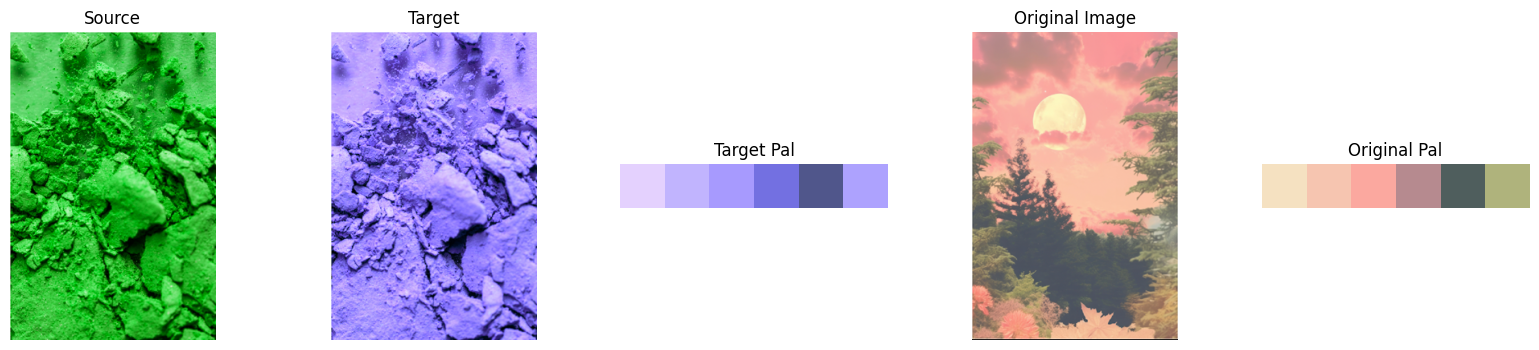

In [130]:
# Source Image: The input image before any transformations.
# Target Image: The desired output after processing.
# Target Palette: A set of colors intended for use in transforming the source image.
# Original Image: A reference point that may represent an unmodified version of the source.
# Original Palette: The colors present in the original input image.

# Retrieve the dataset entry at index 5 (you can also use a random index)
x = dataset[5]  # Access a sample from the dataset

# Print the shape of the source image (commented out for now)
# print(x["source"].shape)

# Create a figure with subplots to display multiple images side by side
fig, ax = plt.subplots(1, 5, squeeze=True, figsize=(20, 4))

# Display the source image in LAB color space converted to RGB
ax[0].imshow(convertor.lab2rgb(x["source"])); ax[0].axis(False); ax[0].title.set_text("Source")

# Display the target image in LAB color space converted to RGB
ax[1].imshow(convertor.lab2rgb(x["tar"])); ax[1].axis(False); ax[1].title.set_text("Target")

# Display the target palette in LAB color space converted to RGB
ax[2].imshow(convertor.lab2rgb(x["TPal"])); ax[2].axis(False); ax[2].title.set_text("Target Pal")

# Display the original image in LAB color space converted to RGB (if applicable)
ax[3].imshow(convertor.lab2rgb(x["OG"])); ax[3].axis(False); ax[3].title.set_text("Original Image")

# Display the original palette in LAB color space converted to RGB (if applicable)
ax[4].imshow(convertor.lab2rgb(x["OGPal"])); ax[4].axis(False); ax[4].title.set_text("Original Pal")